In [1]:
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import numpy as np

# Scipy

Scipy is a library with many numerical algorithm

* Special functions
* Integrals
* Differential equations
* optimisation
* linear algebra

## Special functions

Fonctions not in numpy : Bessel, Airy, error function... 

In [2]:
from scipy.special import erf, jn

In [3]:
erf(1)

0.8427007929497148

## Numerical integration

Many algorithm. The simplest : ``quad``

Example : error function
    $$ \mathrm{erf}(x) = \int_0^x \frac{2}{\sqrt{\pi}} e^{-t^2} dt$$
    
Remarks : 

* Integration to infinity (``np.inf``)
* If you have the function, do not use an array. Quad is smarter than you.
* If you have points, use ``trapz`` or ``simps``

In [6]:
from scipy.integrate import quad
def ma_fonction(t):
    return 2/np.sqrt(np.pi)*np.exp(-t**2)

result, error = quad(ma_fonction, 0, 1)
print(result)

0.8427007929497149


In [7]:
quad(ma_fonction, 0, np.inf)

(0.9999999999999998, 8.012979797664483e-09)

11.5

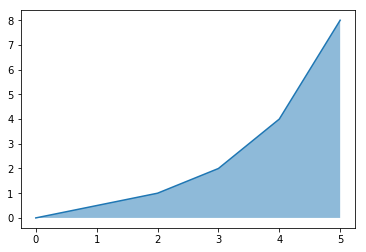

In [9]:
from scipy.integrate import trapz

data_y = [0, 1, 2, 4, 8]
data_x = [0, 2, 3, 4, 5]

plt.plot(data_x, data_y)
plt.fill_between(data_x, data_y, alpha=.5)

trapz(data_y, data_x)

## Ordinary differential equations

## Equations différentielles

The package ``scipy.integrate`` contains functions to solve ODE : 

$$\frac{dy}{dt} = f(t, y)$$
    
with given initial conditions ($y$ is known at time $t_0$). Note that $y$ can be a vector (``np.array``).

We use ``solve_ivp`` (replace ``ode`` or ``odeint``): 

    def solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, ...)
    
On can choos the integration metdhod (by default Runge-Kutta order 5(4) with adaptative steps)

The function ``solve_ivp`` returns an object (a dictionnary) with the result (res.y) and information about the convergence of the algorithm.

Example : 
$$\frac{dy}{dt} = -y$$    


### Higher order differential equation

Increase the dimension of $y$ by adding derivative. 

For example : 

$$\frac{d^2y}{dt^2} = \frac{f(y)}{m}$$

became :

$$\frac d{dt} \begin{pmatrix}
y \\ 
y ^\prime
\end{pmatrix} = \begin{pmatrix}
y ^\prime \\
f(y)/m
\end{pmatrix} = F(y, y^\prime)$$



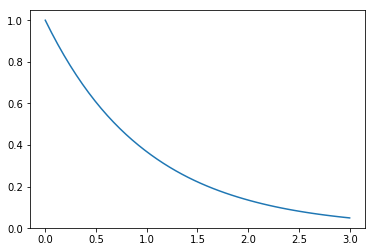

In [14]:
%matplotlib inline

from scipy.integrate import solve_ivp
from matplotlib.pyplot import figure

def f(t, y):
    return -y

res = solve_ivp(f, t_span=[0, 3], y0 = [1], t_eval = np.linspace(0, 3))

fig = figure()
ax = fig.subplots(1, 1)

ax.plot(res.t, res.y[0, :])

## Optimisation

* Zeros of a function
* Minimum
* least square / fit


Example : 
* first positive solution of $\tan(x)=x$
* First minimum of $sinc(x)$

(-2, 12)

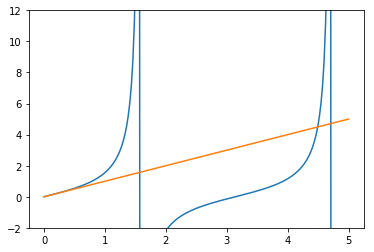

In [20]:
from scipy.optimize import root_scalar, minimize_scalar

fig = figure()
ax = fig.subplots(1, 1)

x = np.linspace(0, 5, 200)
ax.plot(x, np.tan(x))
ax.plot(x, x)

ax.set_ylim(-2, 12)

In [28]:
def the_function(y):
    return np.tan(y) - y

res = root_scalar(the_function, x0=4.3, x1=4.5)
res.root

4.493409457908983

In [34]:
# sin(pi*x)/(pi*x)

def french_sinc(x):
    return np.sinc(x/np.pi)


res = minimize_scalar(french_sinc, bounds=(4.3, 4.5))
res.x

4.493409459677675

### Fit

$$ y(x) = a e^{(x-x_0)^2/w^2}$$

<ErrorbarContainer object of 3 artists>

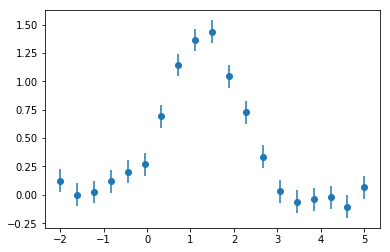

In [41]:
from scipy.optimize import curve_fit

x = np.linspace(-2, 5, 19)
y = 1.45*np.exp(-(x-1.34)**2/1.34)
yn = y + 0.1*np.random.normal(size=len(x))

plt.errorbar(x, yn, yerr=.1, fmt='o')

In [45]:
def gaussian(x, offset, amplitude, x_0, width):
    return offset + amplitude*np.exp(-(x-x_0)**2/width**2)

popt, pcov = curve_fit(gaussian, x, yn, p0 = [0, 1, 1, 1])

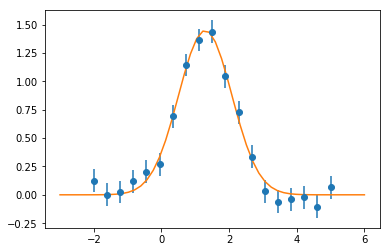

In [46]:
plt.errorbar(x, yn, yerr=.1, fmt='o')
x_plot = np.linspace(-3, 6)
plt.plot(x_plot, gaussian(x_plot, *popt))

In [47]:
popt

array([4.90239855e-04, 1.44768171e+00, 1.29334093e+00, 1.11433104e+00])